In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-dark')

In [25]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

matches.replace('Deccan Chargers','Kolkata Knight RIders',inplace=True)
deliveries.replace('Deccan Chargers','Kolkata Knight RIders',inplace=True)
deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [26]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Q1

In [27]:
kxip_kkr=matches[((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')) & ((matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders'))].copy()
kxip=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')].copy()
kkr=matches[(matches.team1=='Kolkata Knight Riders') | (matches.team2=='Kolkata Knight Riders')].copy()
kxip_kkr.shape,kxip.shape,kkr.shape

((25, 18), (176, 18), (178, 18))

In [28]:
kxip_kkrdeli=deliveries[((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')) & ((deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders'))].copy()
kxipdeli=deliveries[(deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')].copy()
kkrdeli=deliveries[(deliveries.batting_team=='Kolkata Knight Riders') | (deliveries.bowling_team=='Kolkata Knight Riders')].copy()
kxip_kkrdeli.shape,kxipdeli.shape,kkrdeli.shape

((5932, 21), (41713, 21), (41798, 21))

In [29]:
kxip_kkr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN


In [30]:
kxip.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


In [31]:
kkr.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [32]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='lightgreen')
        ax[i].set_title(columns[i])

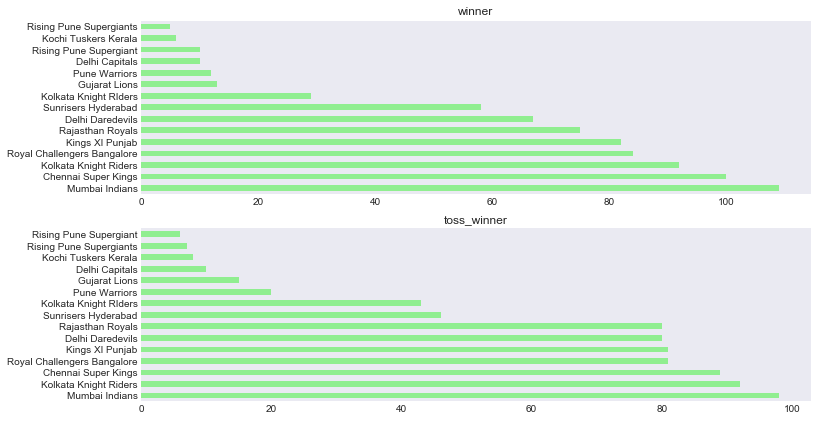

In [33]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

In [34]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['pink','indianred'],autopct='%2.f%%')
        ax[i].set_title(columns[i])

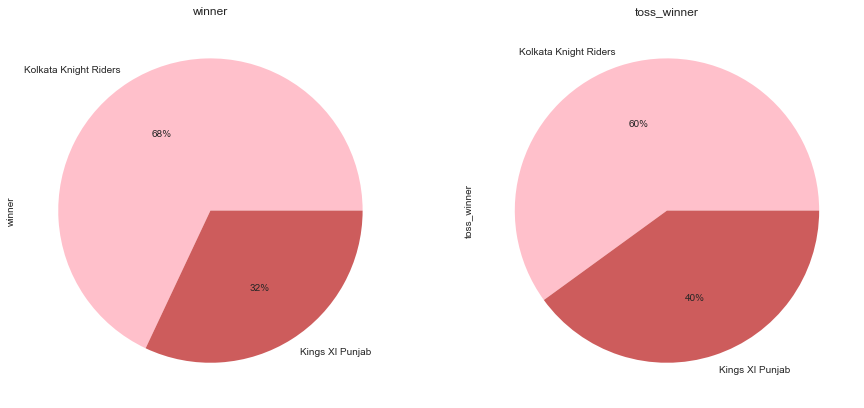

In [35]:
cat_plot(kxip_kkr,['winner','toss_winner'],(15,8),'pie')

### As it is evident from the above exploration KKR will most probably win the match

# Q2

In [36]:
dotballs=kxip_kkrdeli[kxip_kkrdeli.batsman_runs==0].groupby(['match_id']).count().ball
dotballs.describe()

count     25.000000
mean      90.680000
std       14.811932
min       60.000000
25%       84.000000
50%       94.000000
75%      101.000000
max      115.000000
Name: ball, dtype: float64

Text(0.5, 1.0, 'Dot ball Frequency distribution of KKR and KXIP')

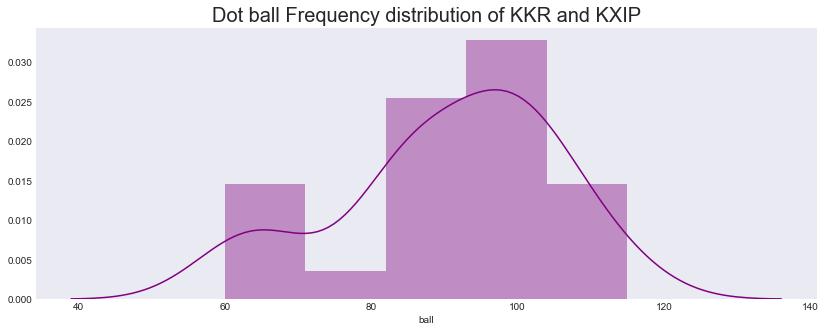

In [37]:
# dotballs.plot.hist(figsize=(12,5),color='purple')
plt.figure(figsize=(14,5))
sns.distplot(dotballs,color='purple')
plt.title('Dot ball Frequency distribution of KKR and KXIP',fontsize=20)

### As we can see dot balls are likely to happen within the range of 80 to 97

# Q3

In [38]:
wickets_fall=kxip_kkrdeli.query('over>=15 & over<=20').groupby(['match_id','over','ball','dismissal_kind']).count()
wickets_fall=wickets_fall.groupby('match_id').sum()
wickets_fall=wickets_fall.player_dismissed.describe()
wickets_fall

count    25.000000
mean      5.080000
std       2.361497
min       2.000000
25%       3.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: player_dismissed, dtype: float64

(0, 15)

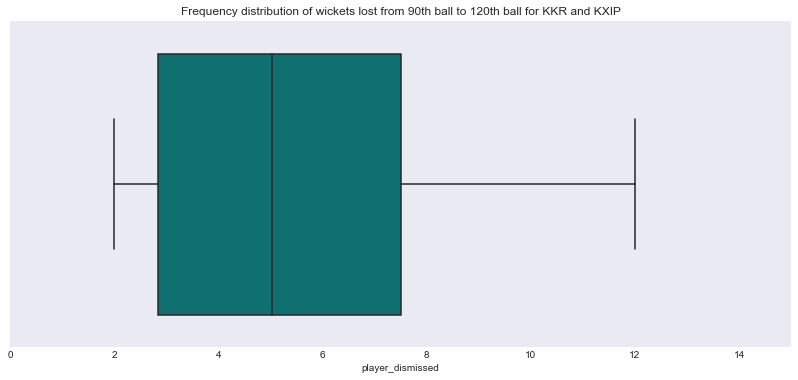

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(wickets_fall,color='teal')
plt.title('Frequency distribution of wickets lost from 90th ball to 120th ball for KKR and KXIP')
plt.xlim([0,15])

### Most likely 4-6 wickets will fall between the 90th ball and 120th ball

# Q4

In [40]:
total_runskxip=kxipdeli.query('batting_team=="Kings XI Punjab"').groupby('match_id').total_runs.sum()
total_runskxip.describe()

count    176.000000
mean     158.482955
std       32.398761
min       68.000000
25%      135.750000
50%      163.000000
75%      181.000000
max      232.000000
Name: total_runs, dtype: float64

In [41]:
maxwell_runs=kxipdeli.query('batting_team=="Kings XI Punjab" & batsman=="GJ Maxwell"').groupby('match_id').batsman_runs.sum()
maxwell_runs.describe()

count    50.000000
mean     23.740000
std      26.961658
min       0.000000
25%       2.500000
50%      13.500000
75%      42.250000
max      95.000000
Name: batsman_runs, dtype: float64

In [42]:
total_runskxip_kkr=kxip_kkrdeli.query('batting_team=="Kings XI Punjab"').groupby('match_id').total_runs.sum()
total_runskxip_kkr.describe()

count     25.00000
mean     160.44000
std       26.99858
min      119.00000
25%      138.00000
50%      157.00000
75%      178.00000
max      221.00000
Name: total_runs, dtype: float64

In [43]:
maxwell_runs_kkr=kxip_kkrdeli.query('batting_team=="Kings XI Punjab" & batsman=="GJ Maxwell"').groupby('match_id').batsman_runs.sum()
maxwell_runs_kkr.describe()

count    10.000000
mean     25.200000
std      21.719423
min       0.000000
25%       8.000000
50%      20.000000
75%      40.500000
max      68.000000
Name: batsman_runs, dtype: float64

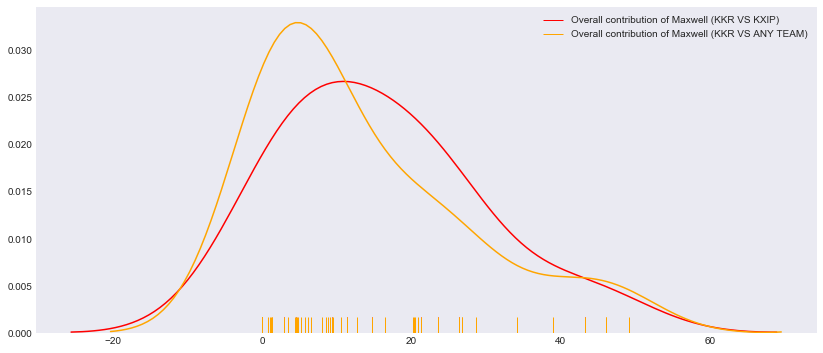

In [44]:
plt.figure(figsize=(14,6))
sns.distplot((maxwell_runs_kkr/total_runskxip_kkr)*100,hist=False,color='red',rug=True)
sns.distplot((maxwell_runs/total_runskxip)*100,hist=False,color='orange',rug=True)
plt.legend(['Overall contribution of Maxwell (KKR VS KXIP)','Overall contribution of Maxwell (KKR VS ANY TEAM)'])


### We can infer from the above graph that Maxwell's contribution will be around 15-22%

# Q5

In [45]:
noball_count=kxip_kkrdeli.groupby(['match_id']).noball_runs.sum()
noball_count.describe()

count    25.000000
mean      0.440000
std       0.650641
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       2.000000
Name: noball_runs, dtype: float64

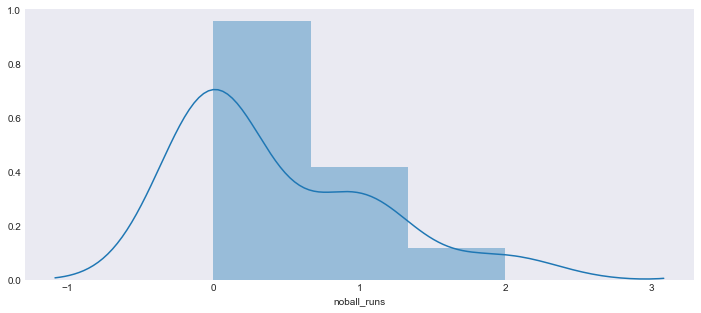

In [46]:
plt.figure(figsize=(12,5))
sns.distplot(noball_count)

### There are high chances of only 0-1 no balls getting bowled in the match